In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [8]:
datum = '?????'
ext = '.neu'
dir_in = 'data/GPS'

In [9]:
pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS\d*?????.neu


In [10]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [11]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\dAB44_99999X006_ULR6B.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2005-08-15  2005.6205 -0.0134 -0.0114    0.0163    0.0043   0.0037   
2005-08-16  2005.6233 -0.0120 -0.0125    0.0137    0.0039   0.0035   
2005-08-17  2005.6260 -0.0142 -0.0137    0.0185    0.0038   0.0033   
2005-08-18  2005.6288 -0.0124 -0.0132    0.0196    0.0037   0.0033   
2005-08-19  2005.6315 -0.0132 -0.0116    0.0229    0.0048   0.0040   

            VerticalSTD  
Year                     
2005-08-15       0.0103  
2005-08-16       0.0095  
2005-08-17       0.0100  
2005-08-18       0.0095  
2005-08-19       0.0106  


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2005-10-06  2005.7633  0.3145  0.2623   -0.0673    0.0012   0.0007   
2005-10-07  2005.7659  0.3134  0.2667   -0.



data/GPS\dSCOR_43006M002_ULR6B.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2005-02-02  2005.0890  0.0122 -0.0053    0.0081    0.0088   0.0076   
2005-02-03  2005.0918  0.0174 -0.0108    0.0076    0.0032   0.0029   
2005-02-04  2005.0945  0.0102 -0.0046    0.0029    0.0028   0.0029   
2005-02-05  2005.0973  0.0118 -0.0062    0.0082    0.0026   0.0022   
2005-02-06  2005.1000  0.0120 -0.0034    0.0085    0.0029   0.0029   

            VerticalSTD  
Year                     
2005-02-02       0.0279  
2005-02-03       0.0068  
2005-02-04       0.0068  
2005-02-05       0.0064  
2005-02-06       0.0083  


data/GPS\dTBON_XXXXXXXXX_NGL14.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2008-04-26  2008.3203  0.0817  0.1215   -0.0208    0.0024   0.0015   
2008-04-27  2008.3231  0.0848  0.1209   -0.

In [12]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    
    return res

def test_plot_OLS(df, res, site, var):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    



data/GPS\dAB44_99999X006_ULR6B.neu
f: 0
Trend = 0.05 mm/yr


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
f: 1
Trend = 0.02 mm/yr


data/GPS\dAB50_99999X007_ULR6B.neu
f: 2
Trend = 0.05 mm/yr


data/GPS\dAKSE_XXXXXXXXX_NGL14.neu
f: 3
Trend = 0.04 mm/yr


data/GPS\dAKSI_XXXXXXXXX_NGL14.neu
f: 4
Trend = 0.08 mm/yr


data/GPS\dANC2_XXXXXXXXX_NGL14.neu
f: 5
Trend = 0.01 mm/yr


data/GPS\dCHUR_40128M002_ULR6B.neu
f: 6
Trend = 0.03 mm/yr


data/GPS\dEYAC_99999X043_ULR6B.neu
f: 7
Trend = 0.00 mm/yr


data/GPS\dJNU1_49519S001_NGL14.neu
f: 8
Trend = 0.05 mm/yr


data/GPS\dKEN5_XXXXXXXXX_NGL14.neu
f: 9
Trend = 0.06 mm/yr


data/GPS\dNUUK_43013M001_NGL14.neu
f: 10
Trend = 0.03 mm/yr


data/GPS\dQAQ1_43007M001_ULR6B.neu
f: 11
Trend = 0.01 mm/yr


data/GPS\dSCOR_43006M002_ULR6B.neu
f: 12
Trend = 0.01 mm/yr


data/GPS\dTBON_XXXXXXXXX_NGL14.neu
f: 13
Trend = 0.01 mm/yr


data/GPS\dTHU1_43001M001_ULR6B.neu
f: 14
Trend = 0.01 mm/yr


data/GPS\dTHU2_43001M002_ULR6B.neu
f: 15
Trend = 0.02 mm/yr


data/GPS\dTHU3_4

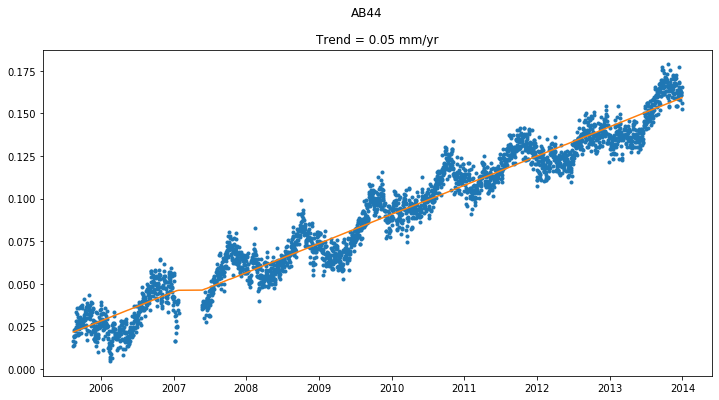

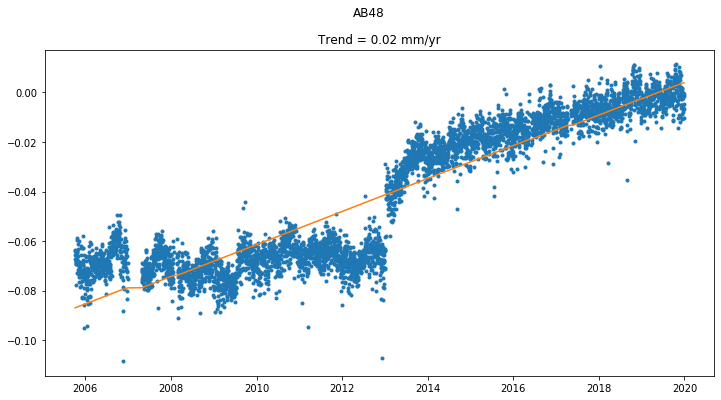

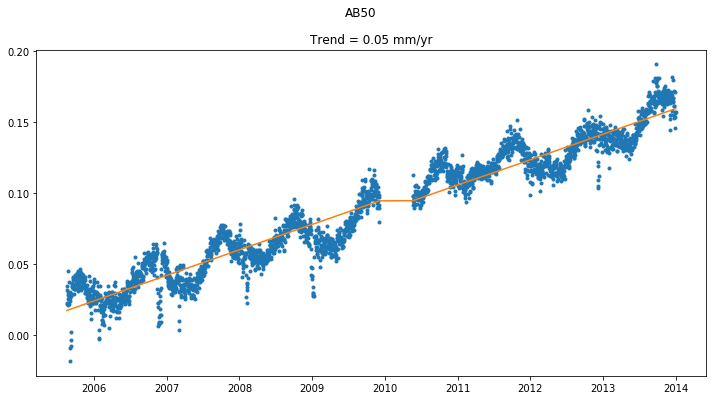

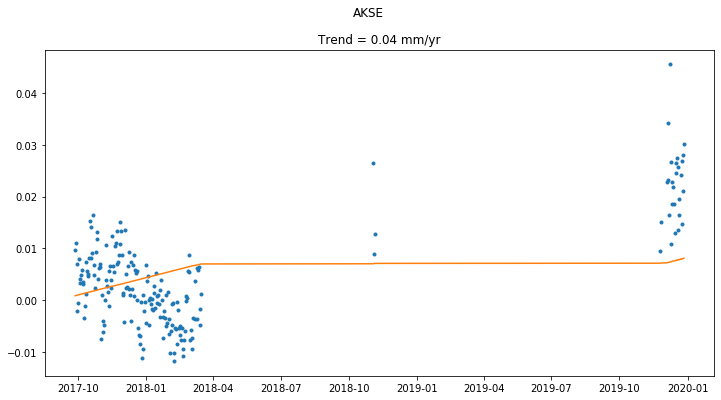

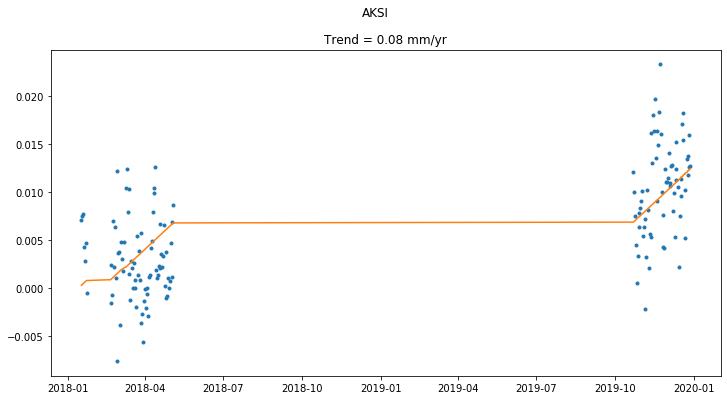

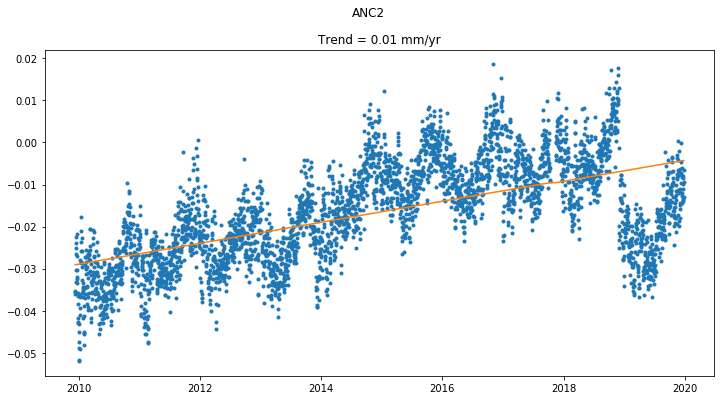

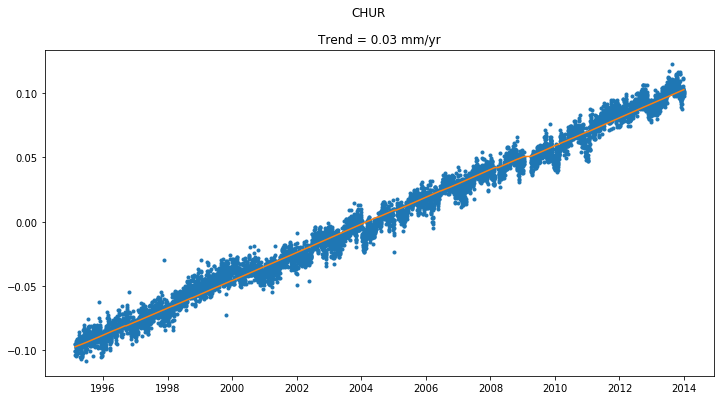

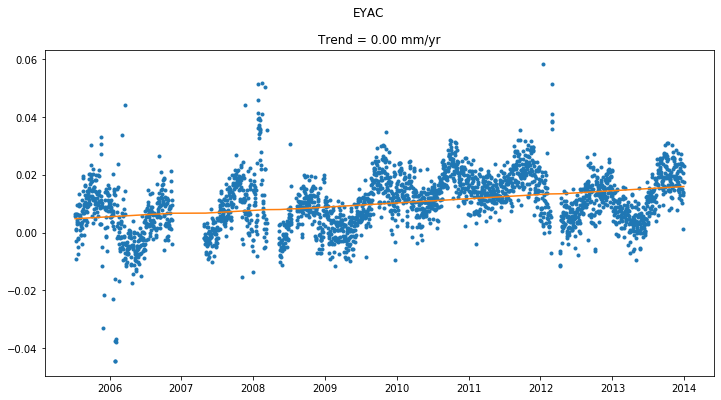

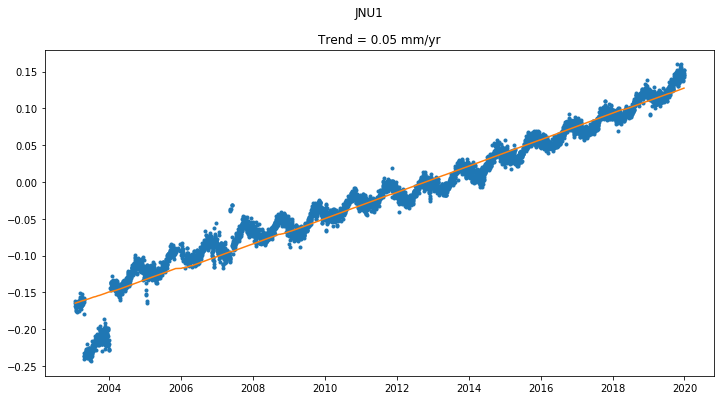

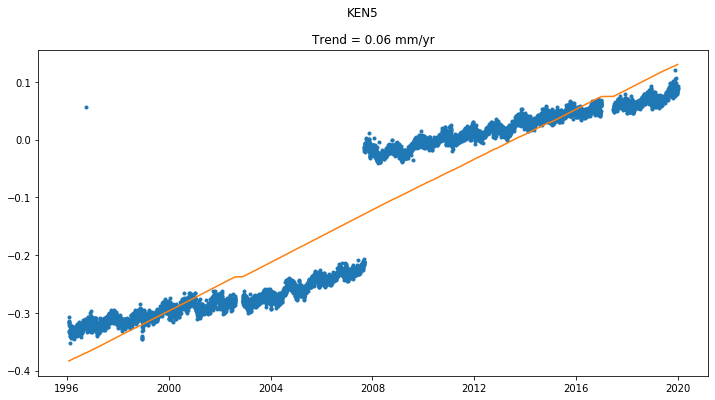

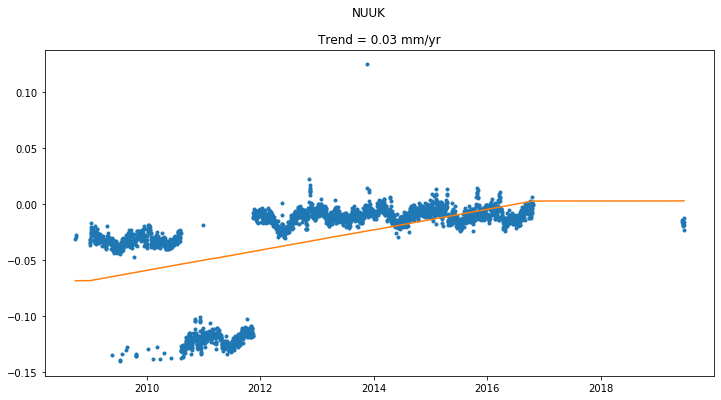

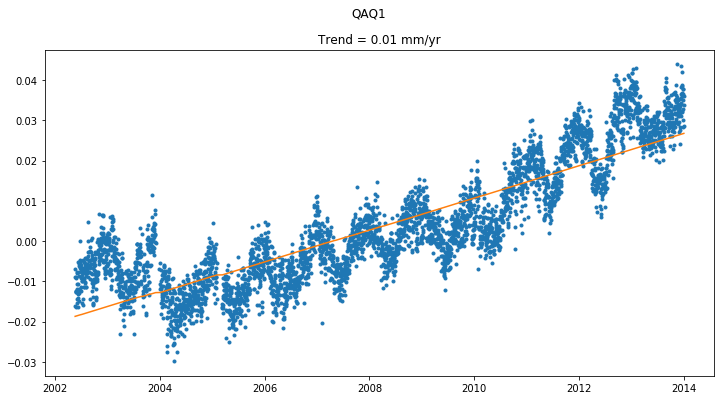

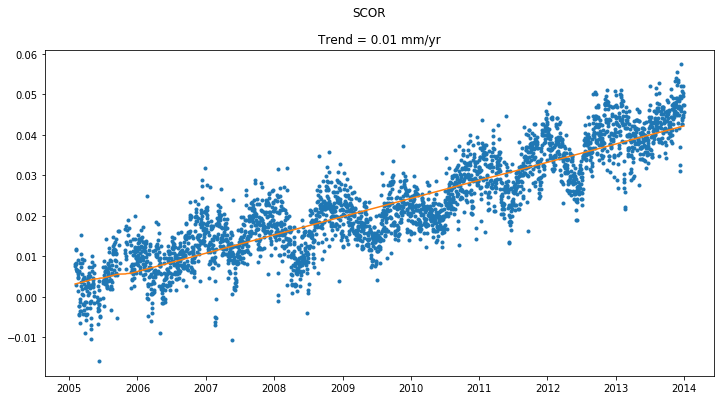

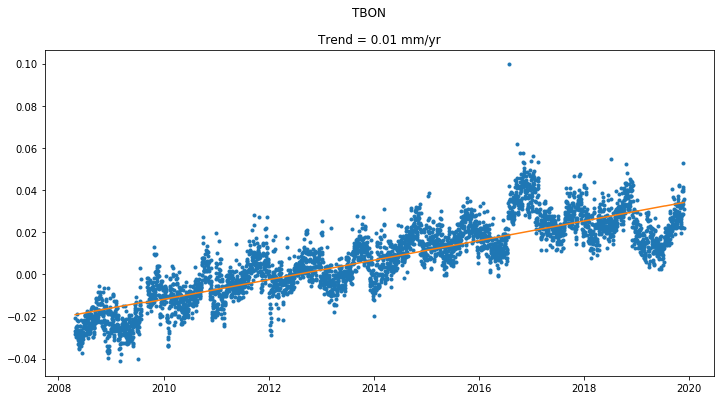

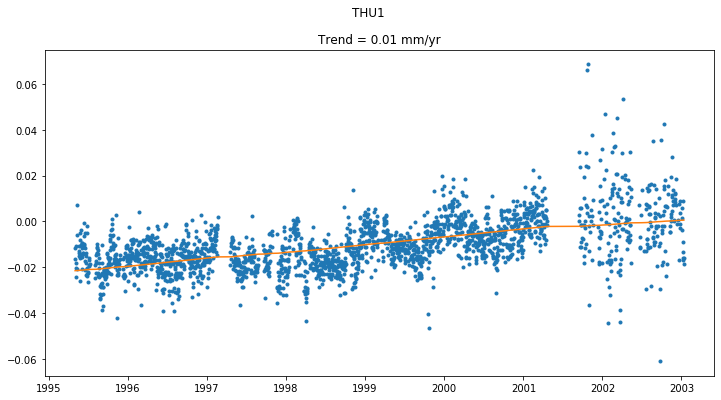

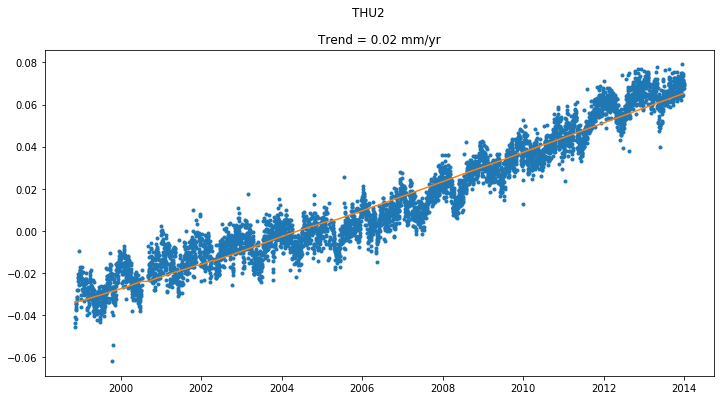

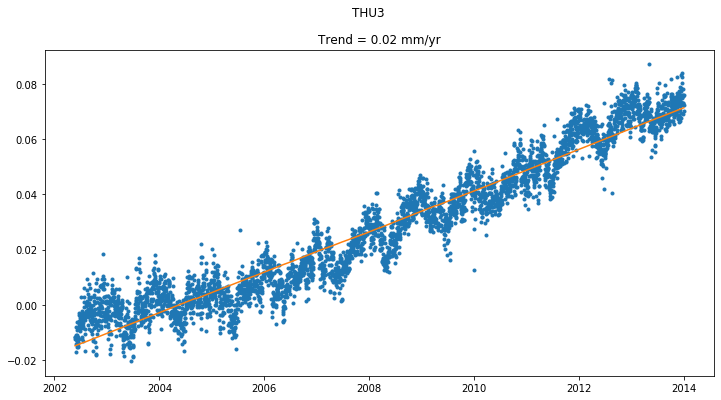

In [13]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = res.params.x1
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
#     print(res.summary())

    # Make Plot
    test_plot_OLS(df, res, filepath[-24:-20], 'Vertical')